<span style="color: orange">DRAFT: WILL BE FINALIZED BY FRIDAY. PROBABLY ONLY SMALL CHANGES IF ANY.</span>

## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due 13 November, 2019 at 6:00 PM
### <span style="color: red">Kevin Egedy</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Fourier Analysis. 
- If you would like more resources, the following book is a good place to start. It is actually the notes used to teach intro signal processing at Stanford. Most of the material I covered in class is in these notes, plu a whole lot more.
> Osgood, [Lecture notes for EE 261](
https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf).
- A more advanced and concise treatment of the subject is in the following book.
> Stein and Shakarchi, [Fourier Analysis: An Introduction](https://www.amazon.com/Fourier-Analysis-Introduction-Princeton-Lectures/dp/069111384X/ref=sr_1_1?keywords=stein+and+shakarchi+fourier&qid=1572974320&sr=8-1).

In [1]:
# Imports
import io
import requests
import math
import pandas as pd
import numpy as np
import mpmath
import sympy as sp
sp.init_printing(use_latex='mathjax')
from sympy.utilities.lambdify import lambdify
import scipy
import scipy.ndimage
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

Complex number $0$ is equivalent to $ 0e^{i \theta}$.
<br><br>
Complex number $1$ is equivalent to $ 1e^{i 0}$.
<br><br>
Complex number $-1$ is equivalent to $ 1e^{-i \pi}$.
<br><br>
Complex number $i$ is equivalent to $ 1e^{i \pi/2}$.
<br><br>
Complex number $1-2i$ is equivalent to $ \sqrt{5}e^{-1.1071 i}$.
<br><br>
Complex number $-8+7i$ is equivalent to $ \sqrt{113}e^{2.4228i}$.

In [9]:
# Go from complex number to polar
def complexPolar(a,b):
    '''
    Takes complex numbers and finds its polar equivalent such that (a+bi) = r*e^(i*theta)
    r*e^(i*theta) = r * (cos(theta) + i*sin(theta))
    abs(),cmath.phase(i)
    '''
    r = 0; theta = 0
    r = sp.sqrt(abs(a)**2+abs(b)**2)
    if a==0 and b==0:
        theta = 0
    elif a==0 and b>0:
        theta = sp.pi/2
    elif a==0 and b<0:
        theta = -sp.pi/2
    elif a>0 and b==0:
        theta = 0
    elif a<0 and b==0:
        theta = -sp.pi
    elif a<0 and b!=0:
        theta = round((sp.atan(b/a) + sp.pi).evalf(),4)
    else:
        theta = round(sp.atan(b/a),4)
    return print(f'({a} + {b}i) = {r}*exp(({theta})j)')

In [10]:
complexPolar(0,0)  # 0
complexPolar(1,0)  # 1
complexPolar(-1,0) # -1
complexPolar(0,1)  # i
complexPolar(1,-2) # 1-2i
complexPolar(-8,7) # -8+7i

(0 + 0i) = 0*exp((0)j)
(1 + 0i) = 1*exp((0)j)
(-1 + 0i) = 1*exp((-pi)j)
(0 + 1i) = 1*exp((pi/2)j)
(1 + -2i) = sqrt(5)*exp((-1.1071)j)
(-8 + 7i) = sqrt(113)*exp((2.4228)j)


In [17]:
# Go from polar to complex number:  r * (cos(theta) + i*sin(theta))
def polarComplex(r,theta):
    return print(r * (sp.cos(theta)+sp.sin(theta)*sp.I))

In [18]:
polarComplex(0,0)
polarComplex(1,0)
polarComplex(1,-sp.pi)
polarComplex(1,sp.pi/2)
polarComplex(math.sqrt(5),-1.1071)
polarComplex(math.sqrt(113),2.4228)

0
1
-1
I
1.00009743440143 - 1.99995127983251*I
-8.00026141664386 + 6.99970122686388*I


### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

We know $e^{(\theta)i} = \cos{(\theta)} + i \sin{(\theta)} $, so 
<br><br>
$$e^{(\alpha+\beta)i} = \cos{(\alpha+\beta)} + i \sin{(\alpha+\beta)} .$$

<hr>

$\begin{eqnarray}
e^{(\alpha+\beta)i} & = & e^{\alpha i}e^{\beta i} \\
& = & (\cos{\alpha} + i \sin{\alpha})(\cos{\beta} + i \sin{\beta}) \\
& = & \cos{\alpha}\cos{\beta} + i \cos{\alpha}\sin{\beta} + 
        i \sin{\alpha}\cos{\beta} + (i \sin{\alpha})(i \sin{\beta}) \\
& = & (\cos{\alpha}\cos{\beta} - \sin{\alpha}\sin{\beta}) + 
        i(\cos{\alpha}\sin{\beta} + \sin{\alpha}\cos{\beta}) \\
\end{eqnarray}$

<hr>

Using trigonometric identities: 
<br><br>
$\begin{eqnarray}
\cos{(A+B)} & = & \cos{A}\cos{B} - \sin{A}\sin{B} \\
\sin{(A+B)} & = & \sin{A}\cos{B} + \cos{A}\sin{B}
\end{eqnarray}$
<br><br>
Then

- $(\cos{\alpha}\cos{\beta} - \sin{\alpha}\sin{\beta}) + 
        i(\cos{\alpha}\sin{\beta} + \sin{\alpha}\cos{\beta})$
- $(\cos{\alpha}\cos{\beta} - \sin{\alpha}\sin{\beta}) + 
        i(\sin{\alpha}\cos{\beta} + \sin{\beta}\cos{\alpha})$
- $\cos{(\alpha+\beta)} + i \sin{(\alpha+\beta)}$

Thus $e^{(\alpha+\beta)i} = \cos{(\alpha+\beta)} + i \sin{(\alpha+\beta)}.$

### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

In [17]:
'This is the relevant example from class'

# Example: Square Wave
# f(t) = 1, if t in [0, 1/2)
#       -1, if t in [1,2, 1)
# Note that the magnitude of the coefficients decreases like 1/n, showing that
# higher and higher frequencies contribute less and less to the overall shape.

t = sp.symbols("t", real=True)
n = sp.symbols("n", integer=True, positive=True)
q = -sp.pi*sp.I*n*t/T # arguments of the exponential in the cn equation

f = sp.cos(2*sp.pi*t)  # function of interest
T = sp.Rational(1,4) # half period (since symmetric interval is used)
period = 2*T

# Formula for the complex coefficients
cn = (1 / (period))*sp.integrate(f*sp.exp(q), (t,-T,T))
cn # Complex coefficients

'This is the relevant example from class'

              2                             2              
- ────────────────────────── - ────────────────────────────
       2  ⅈ⋅π⋅n        ⅈ⋅π⋅n        2  -ⅈ⋅π⋅n        -ⅈ⋅π⋅n
  8⋅π⋅n ⋅ℯ      - 2⋅π⋅ℯ        8⋅π⋅n ⋅ℯ       - 2⋅π⋅ℯ      

In [57]:
# Here are some of the terms of the Fourier Series
N = 10
vals = range(math.floor(-N/2),math.ceil(N/2))
terms = [cn.subs(n,k)*sp.exp(sp.pi*sp.I*k*t/T) for k in vals]
terms = [i for i in terms if i != sp.nan]
terms

⎡   -20⋅ⅈ⋅π⋅t      -16⋅ⅈ⋅π⋅t      -12⋅ⅈ⋅π⋅t      -8⋅ⅈ⋅π⋅t      -4⋅ⅈ⋅π⋅t       
⎢2⋅ℯ           -2⋅ℯ            2⋅ℯ           -2⋅ℯ           2⋅ℯ          2  2⋅
⎢────────────, ──────────────, ────────────, ─────────────, ───────────, ─, ──
⎣    99⋅π           63⋅π           35⋅π           15⋅π          3⋅π      π    

 4⋅ⅈ⋅π⋅t      8⋅ⅈ⋅π⋅t      12⋅ⅈ⋅π⋅t      16⋅ⅈ⋅π⋅t ⎤
ℯ         -2⋅ℯ          2⋅ℯ          -2⋅ℯ         ⎥
────────, ────────────, ───────────, ─────────────⎥
 3⋅π          15⋅π          35⋅π          63⋅π    ⎦

10

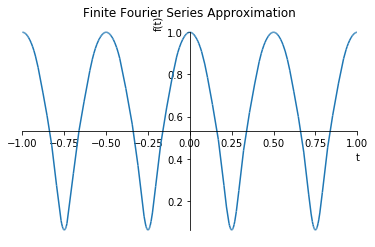

 1208
─────
385⋅π

In [58]:
# Plot the sum of all the terms versus theta
len(terms)
fapprox = sp.re(sum(terms))
sp.plot(fapprox,(t,-1,1),title=r"Finite Fourier Series Approximation")
plt.show()
fapprox.subs(t,1)

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

In [ ]:
# integrate or use trig identity

### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`. Make sure to simplify, these shouldn't give complicated results. Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{ 
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

In [25]:
# 5.a) An example of how to check

t, s = sp.var("t s")

Ff_a = sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) * 0,(t,-sp.oo, 0))

Ff_b = sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) * 1,(t,0, sp.oo))

Ff1 = Ff_a.simplify() + Ff_b.simplify()
Ff1

⎧      -ⅈ              │         π│   π
⎪     ─────        for │arg(s) + ─│ < ─
⎪     2⋅π⋅s            │         2│   2
⎪                                      
⎪∞                                     
⎨⌠                                     
⎪⎮  -2⋅ⅈ⋅π⋅s⋅t                         
⎪⎮ ℯ           dt       otherwise      
⎪⌡                                     
⎪0                                     
⎩                                      

In [21]:
f2 = 1/(1+t**2)
Ff2 = sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) * f,(t,-sp.oo, sp.oo))
Ff2.simplify()

⎧       -2⋅π⋅s               
⎪    π⋅ℯ            for s > 0
⎪                            
⎪∞                           
⎪⌠                           
⎪⎮   -2⋅ⅈ⋅π⋅s⋅t              
⎨⎮  ℯ                        
⎪⎮  ─────────── dt  otherwise
⎪⎮      2                    
⎪⎮     t  + 1                
⎪⌡                           
⎪-∞                          
⎩                            

In [24]:
f = sp.exp(-sp.pi*t**2)
Ff3 = sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) *f,(t,-sp.oo, sp.oo))
f3 = Ff3.simplify()

In [ ]:
s = np.linspace(-2,2,1000)
t = s

# The f(t) functions
fta = lambda t: np.where(t>=0, 1, 0)  
ftb = 
ftc = 

# The Fourier Transforms
FTa = abs(1 / (2*np.pi*sm.I*s)) # Can't plot Argand Diagram along with these so let's just do magnitude 
FTb = 
FTc = 

# Begin plotting
fig,ax=plt.subplots(3,2,sharex=True,figsize=(15,7))

ax[0,0].plot(t, fta(t)); ax[0,0].set_ylabel(r"$f(t) =$ step$(t)$")
ax[0,1].plot(s, FTa); ax[0,1].set_ylabel(r"$|F(s)|$")

ax[1,0].plot(t, ftb ); ax[1,0].set_ylabel(r"$f(t)=\frac{1}{1+t^2}$")
ax[1,1].plot(s, FTb); ax[1,1].set_ylabel(r"$F(s)=\pi e^{-2\pi |s|}$")

ax[2,0].plot(t, ftc); ax[2,0].set_ylabel(r"$f(t)=e^{-\pi t^2}$"); ax[2,0].set_xlabel('t');
ax[2,1].plot(s, FTc); ax[2,1].set_ylabel(r"$F(s)=e^{-\pi s^2}$"); ax[2,1].set_xlabel('s');
plt.suptitle('Fourier Transform Pairs')
plt.show()

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations. 

b) Solve for $Y(s)$ in terms of $U(s)$. 

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function. 

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$. 

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$. 

### 7. The DFT

a) Write a python function that takes an integer $N$ and returns a `sympy` matrix representing the DFT matrix $\mathbf{F}$ as defined in the notes. 

b) Define $\mathbf{U} = \frac{1}{\sqrt{N}}\mathbf{F}$. Find the eigenvalues of $\mathbf{U}$ for various values of $N$. What do you notice? Is there a pattern?

c) Make a random sequence of $20$ real numbers between 0 and 1. Find the DFT using your matrix and compare it to the DFT you get using `numpy`'s built in function. Hint: you should convert your $\mathbf{F}$ matrix into a `numpy` matrix first. Plot your sequence, the magnitude of the DFT and the angle of the DFT.

In [29]:
def myDFT(N):
    '''
    Assumes N is a positive integer
    Returns F, the DFT matrix
    '''
    wn = sp.exp(-2*sp.pi*sp.I / N)
    F = np.empty((N,N))
    F = sp.Matrix(F)
    for i in range (0,N):
        for j in range(0,N):
            F[i,j] = wn**(i*j)
            
    return F


myDFT(4)

⎡1  1   1   1 ⎤
⎢             ⎥
⎢1  -ⅈ  -1  ⅈ ⎥
⎢             ⎥
⎢1  -1  1   -1⎥
⎢             ⎥
⎣1  ⅈ   -1  -ⅈ⎦

In [30]:
for N in range(0,5):
    U = (1/sp.sqrt(N) * myDFT(N))
    print(list(U.eigenvals().keys()))

[]
[1]
[-1, 1]
[sqrt(3)/9 - 2*(-1)**(1/3)*sqrt(3)/9 - (-9*(-1)**(2/3)*sqrt(3)/2 - 3*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3)/2 + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(1/3)*sqrt(3))*(-2/3 - (-1)**(1/3)/3 + (-1)**(2/3)/3)/2 + sqrt((-9*(-1)**(2/3)*sqrt(3) - 6*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3) + 2*(-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(1/3)*sqrt(3))*(-2/3 - (-1)**(1/3)/3 + (-1)**(2/3)/3))**2 - 4*(2 - (-1)**(2/3) + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**2 + (-1)**(1/3))**3)/2)**(1/3)/3 - (2 - (-1)**(2/3) + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**2 + (-1)**(1/3))/(3*(-9*(-1)**(2/3)*sqrt(3)/2 - 3*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3)/2 + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(1/3)*sqrt(3))*(-2/3 - (-1)**(1/3)/3 + (-1)**(2/3)/3)/2 + sqrt((-9*(-1)**(2/3)*sqrt(3) - 6*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3) + 2*(-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(

In [28]:
seq = np.random.rand(20).transpose()
myDFT(20)*

array([0.33231229, 0.2249558 , 0.83765536, 0.63342011, 0.95883489,
       0.31577084, 0.89023307, 0.08177553, 0.92504356, 0.24002533,
       0.93859425, 0.90849508, 0.487158  , 0.69064521, 0.23739035,
       0.36500729, 0.60296342, 0.23749663, 0.78437174, 0.92641722])

### 8. Filtering

Repeat the example from the notes on filtering the sum of two sine waves, except do the sum of a sine wave plus zero centered Gaussian noise with variance 0.25. Note, to make a list of numbers random Gaussian numbers, use the function `np.random.normal`. In the notes, a cutoff of 10 was used. Tune this to try to recover the sine wave as best you can in the low pass filtered version.

### 9.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`. 

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it. 

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

**Extra Credit:** Do this exercise with a color image instead of gray scale.

In [39]:
!wget 'https://partycity6.scene7.com/is/image/PartyCity/_pdp_sq_?$_1000x1000_$&$product=PartyCity/615535' -o minion